In [0]:
%pip install tensorflow

Python interpreter will be restarted.
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.11.0
    Not uninstalling absl-py at /databricks/python3/lib/python3.8/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-17456842-b960-4ee2-854a-27064da71926
    Can't uninstall 'absl-py'. No files were found to uninstall.
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Not uninstalling tensorflow-estimator at /databricks/python3/lib/python3.8/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-17456842-b960-4ee2-854a-27064da71926
    Can't uninstall 'tensorflow-estimator'. No files were found to uninstall.
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Not uninstalling tensorboard at /databricks/python3/lib/python3.8/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-17456842-b960-4ee2-854a-

In [0]:
#Import required libraries
import tensorflow as ts
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
#Load data from keras datasets
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [0]:
#Checking shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [0]:
X_train[0]

Out[7]: array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
  

Out[8]: <matplotlib.image.AxesImage at 0x7f54ed232340>

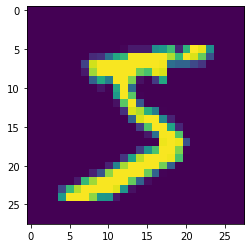

In [0]:
plt.imshow(X_train[0])

In [0]:
y_train[0]

Out[9]: 5

In [0]:
#Normalize data
X_train = X_train/255
X_test = X_test/255

In [0]:
#Reshape X_train, X_test
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)

In [0]:
X_train_flatten[0]

Out[12]: array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        

In [0]:
#Create model and train network

model = keras.Sequential([
        keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['Accuracy'])

model.fit(X_train_flatten, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4711 - Accuracy: 0.8764
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - Accuracy: 0.9162
Epoch 3/10
 334/1875 [====>......

*** WARNING: max output size exceeded, skipping output. ***

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2554 - Accuracy: 0.9292
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2534 - Accuracy: 0.9301
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2507 - Accuracy: 0.9311
Out[16]: <keras.callbacks.History at 0x7f54d0d02e80>

In [0]:
y_predicted = model.predict(X_test_flatten)

313/313 [==============================] - 0s 1ms/step


Out[18]: <matplotlib.image.AxesImage at 0x7f54d0d0b4c0>

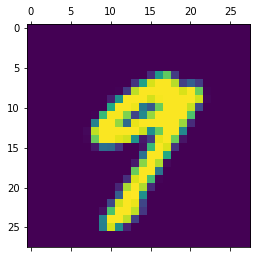

In [0]:
plt.matshow(X_test[20])

In [0]:
np.argmax(y_predicted[20])

Out[19]: 9

In [0]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [0]:
# Draw confusion matrix
cm = ts.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

In [0]:
print(cm)

tf.Tensor(
[[ 965    0    2    2    0    5    3    2    1    0]
 [   0 1109    3    2    0    1    4    2   14    0]
 [   5    8  930   13    9    4   11   10   40    2]
 [   3    0   20  908    0   31    2   12   27    7]
 [   1    1    8    1  910    0    8    4   10   39]
 [  10    2    3   20    9  793   12    8   30    5]
 [  13    3   10    1    7   14  906    2    2    0]
 [   1    6   24    4    5    1    0  960    3   24]
 [   8    8    6   17    9   30    8   11  868    9]
 [  11    7    1    7   18    7    0   27    7  924]], shape=(10, 10), dtype=int32)


Out[25]: Text(69.0, 0.5, 'Original')

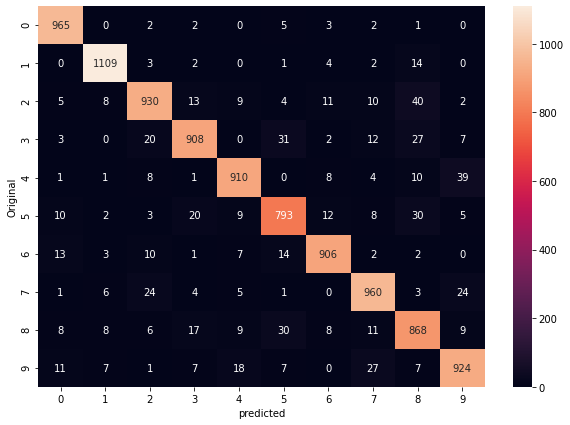

In [0]:
#Visualizing confusion matrix
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel ('predicted')
plt.ylabel('Original')

In [0]:
# Add dense layer and train model
model = keras.Sequential([
        keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
        keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['Accuracy'])

model.fit(X_train_flatten, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2691 - Accuracy: 0.9231
Epoch 2/10
1094/1875 [================>.............] - ETA: 1s - loss: 0.1282 - Accuracy: 0.9623

*** WARNING: max output size exceeded, skipping output. ***

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0235 - Accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0206 - Accuracy: 0.9933
Out[29]: <keras.callbacks.History at 0x7f54d08d5040>

In [0]:
y_predicted = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i)  for i in y_predicted]

313/313 [==============================] - 0s 1ms/step


In [0]:
#Draw confusion matrix
cm = ts.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

Out[33]: Text(69.0, 0.5, 'Original')

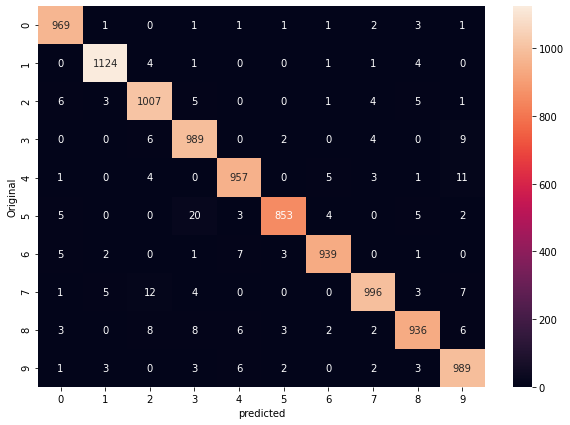

In [0]:
#Visualizing confusion matrix
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel ('predicted')
plt.ylabel('Original')